# Create Clustering Using K-Means Algorithm On Mall Customers Dataset

## Import Libraries

In [68]:
!pip install matplotlib numpy pandas pandas pandas_profiling scikit_learn scipy seaborn pydantic-settings


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [69]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from scipy.stats import kurtosis,skew
import seaborn as sns
from pydantic_settings import BaseSettings
from ydata_profiling import ProfileReport
%matplotlib inline

## Load Dataset

In [70]:
df=pd.read_csv('./Mall_Customersnew.csv')

In [71]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


## Dataset Exploration

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [73]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [74]:
df.drop('CustomerID',inplace=True,axis=1)

In [75]:
df.columns=['Gender','Age','Annual_Income','Spending_Score(1-100)']

In [76]:
df.describe()

,Gender,Age,Annual_Income,Spending_Score(1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [77]:
df.corr()

,Gender,Age,Annual_Income,Spending_Score(1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual_Income,0.056410,-0.012398,1.000000,0.009903
Spending_Score(1-100),-0.058109,-0.327227,0.009903,1.000000


## Data Visulaization

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'Gender'),
  Text(0, 1.5, 'Age'),
  Text(0, 2.5, 'Annual_Income'),
  Text(0, 3.5, 'Spending_Score(1-100)')])

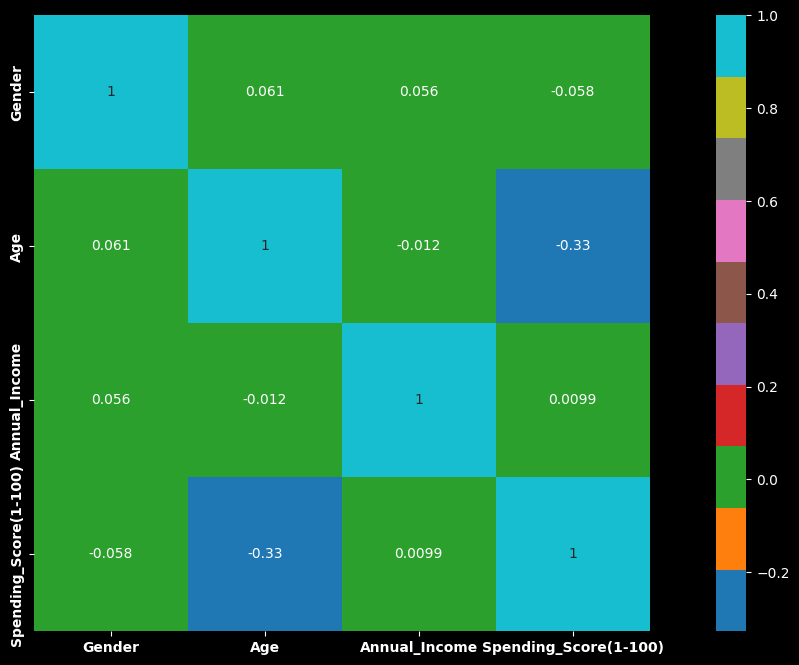

In [78]:
plt.style.use('dark_background')
plt.figure(figsize=(17,8))
sns.heatmap(df.corr(),annot=True,square=True,cmap='tab10')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')

<Figure size 1500x1000 with 0 Axes>

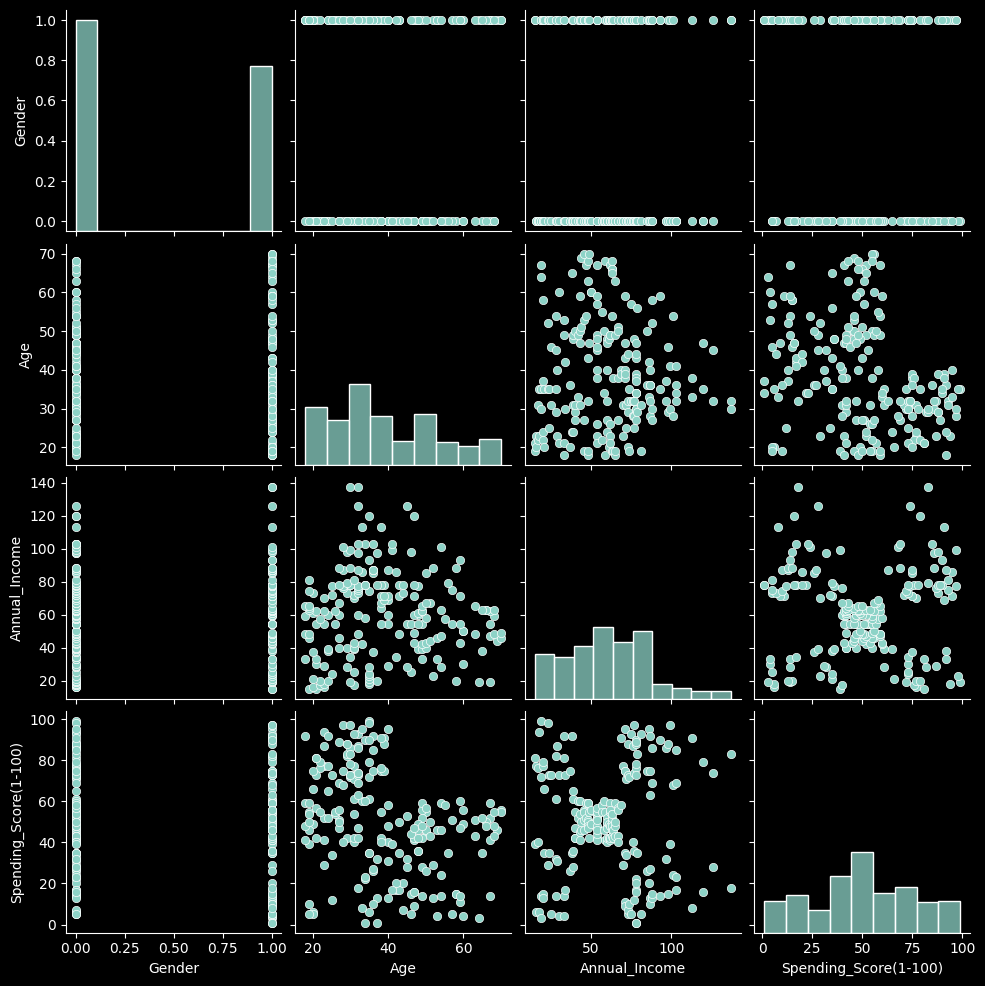

In [79]:
plt.style.use('dark_background')
plt.figure(figsize=(15,10))
sns.pairplot(df)

<Axes: >

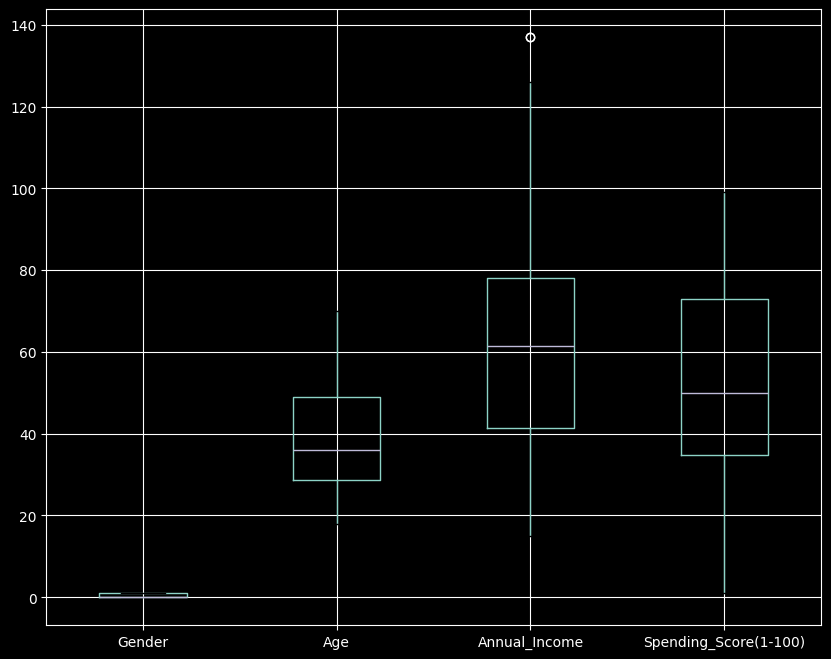

In [80]:
plt.figure(figsize=(10,8))
df.boxplot()

<Axes: ylabel='Density'>

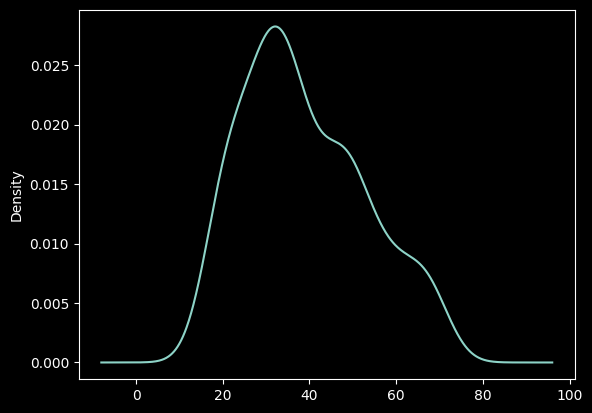

In [81]:
df['Age'].plot.kde()

<Axes: ylabel='Density'>

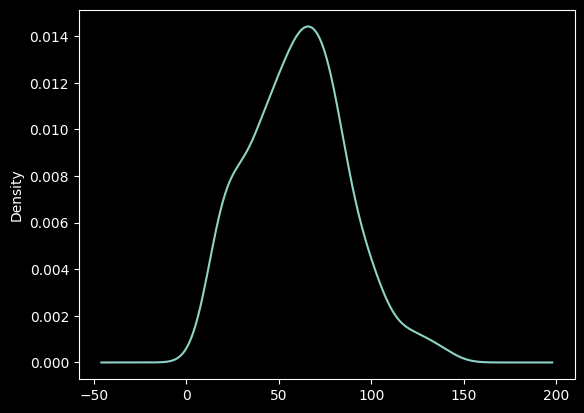

In [82]:
df['Annual_Income'].plot.kde()

<Axes: ylabel='Density'>

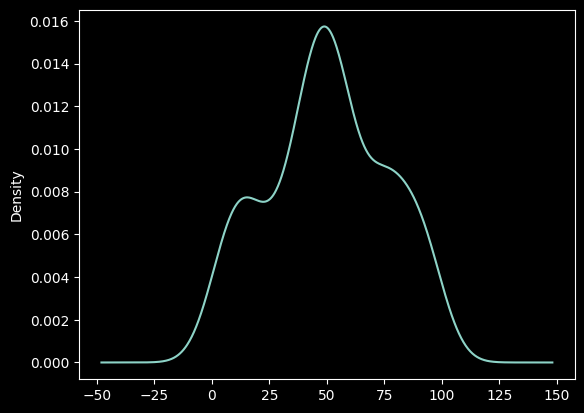

In [83]:
df['Spending_Score(1-100)'].plot.kde()

<Axes: xlabel='Gender', ylabel='Annual_Income'>

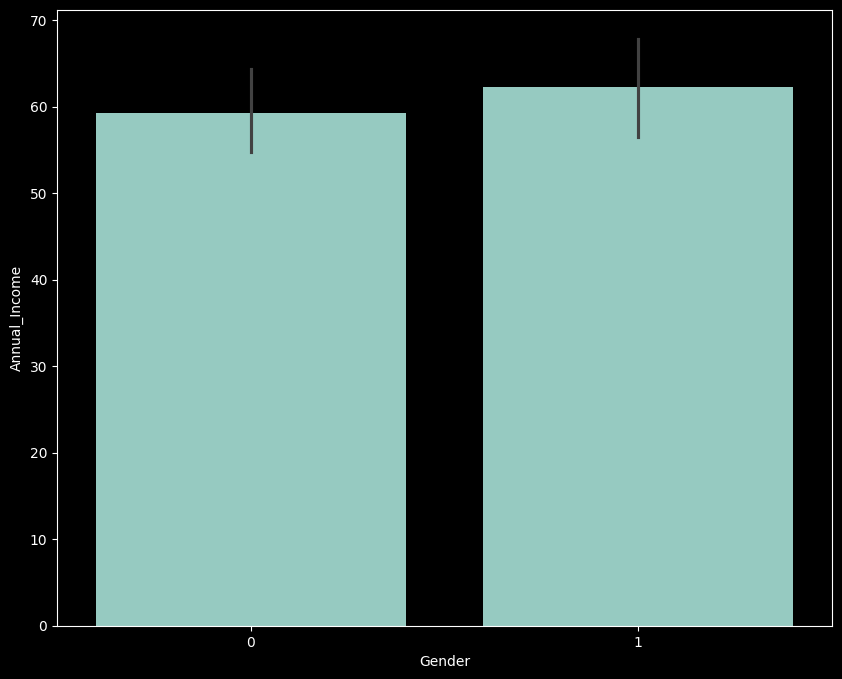

In [84]:
plt.figure(figsize=(10,8))
sns.barplot(x='Gender',y='Annual_Income',data=df)

<Axes: xlabel='Age', ylabel='Annual_Income'>

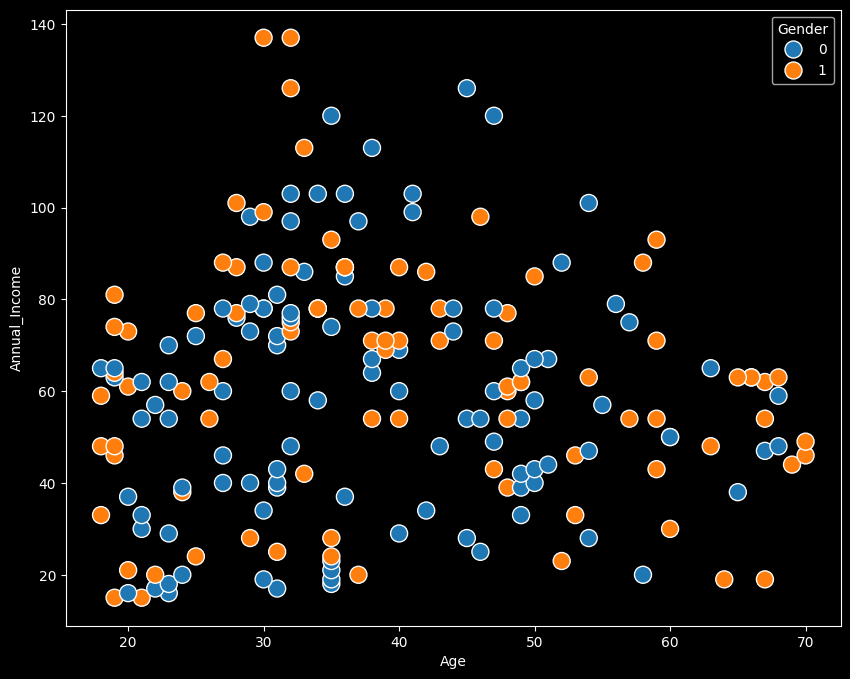

In [85]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Age',y='Annual_Income',hue='Gender',data=df,s=150,palette='tab10')

<Axes: xlabel='Spending_Score(1-100)', ylabel='Annual_Income'>

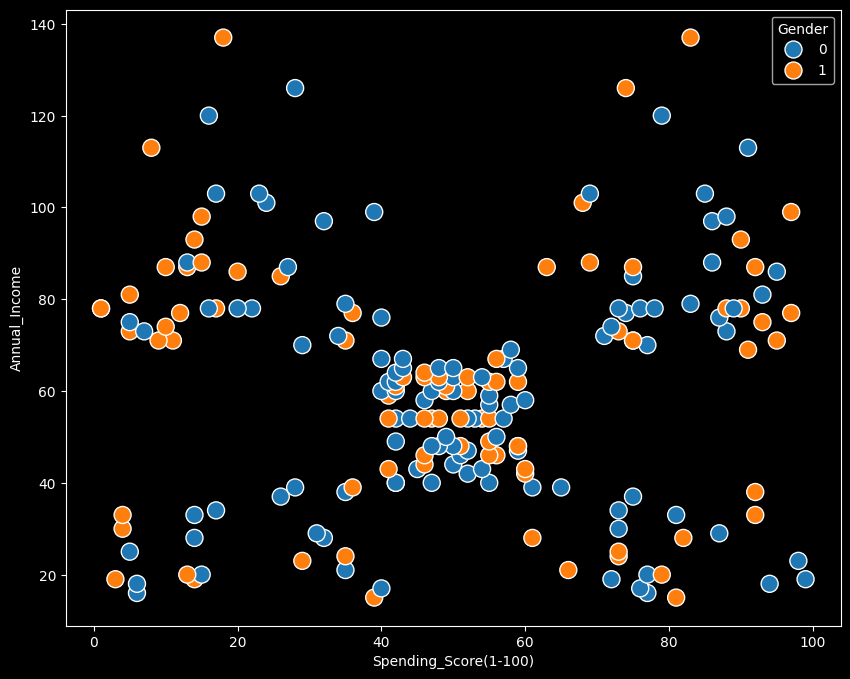

In [86]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Spending_Score(1-100)',y='Annual_Income',hue='Gender',data=df,s=150,palette='tab10')

In [87]:
report=ProfileReport(df)
report.to_file('Mall_Customers_Report')

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]
/home/codespace/.python/current/lib/python3.10/site-packages/ydata_profiling/profile_report.py:384: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 520.32it/s]


## Data Labeling

In [88]:
encoder=LabelBinarizer()
df['Gender']=encoder.fit_transform(df['Gender'])

In [89]:
skew(df)

array([ 0.24174689,  0.48191947,  0.31942368, -0.04686531])

In [90]:
kurtosis(df)

array([-1.94155844, -0.68475139, -0.12589283, -0.83595827])

## Plot Elbow Method For Choosing Value Of K

In [91]:
cluster_no=[i for i in range(1,12)]
WCSS=[]
for i in cluster_no:
    cluster=KMeans(init='k-means++',n_clusters=i,random_state=42)
    cluster.fit(df)
    WCSS.append(cluster.inertia_)

Text(0, 0.5, 'WCSS')

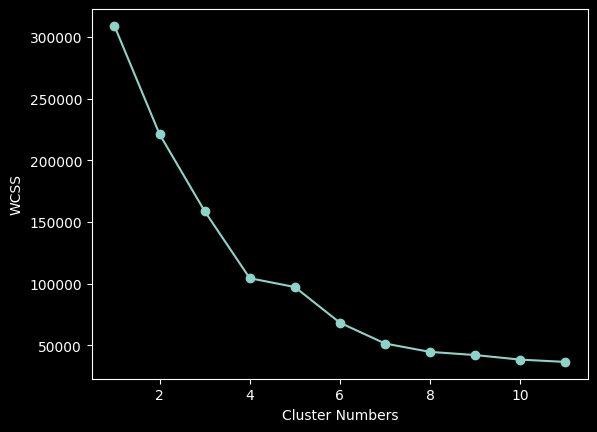

In [92]:
plt.plot(cluster_no,WCSS,marker='o')
plt.xlabel('Cluster Numbers')
plt.ylabel('WCSS')

## K-Means Model

In [93]:
cluster=KMeans(init='k-means++',n_clusters=4,random_state=42)
df['Cluster_No']=cluster.fit_predict(df)

In [94]:
cluster.cluster_centers_

array([[ 0.37894737, 44.89473684, 48.70526316, 42.63157895],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.5       , 24.82142857, 28.71428571, 74.25      ],
       [ 0.52631579, 40.39473684, 87.        , 18.63157895]])

In [95]:
df

,Gender,Age,Annual_Income,Spending_Score(1-100),Cluster_No
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,0
3,0,23,16,77,2
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,3
197,1,32,126,74,1
198,1,32,137,18,3


# Visualize Cluster3

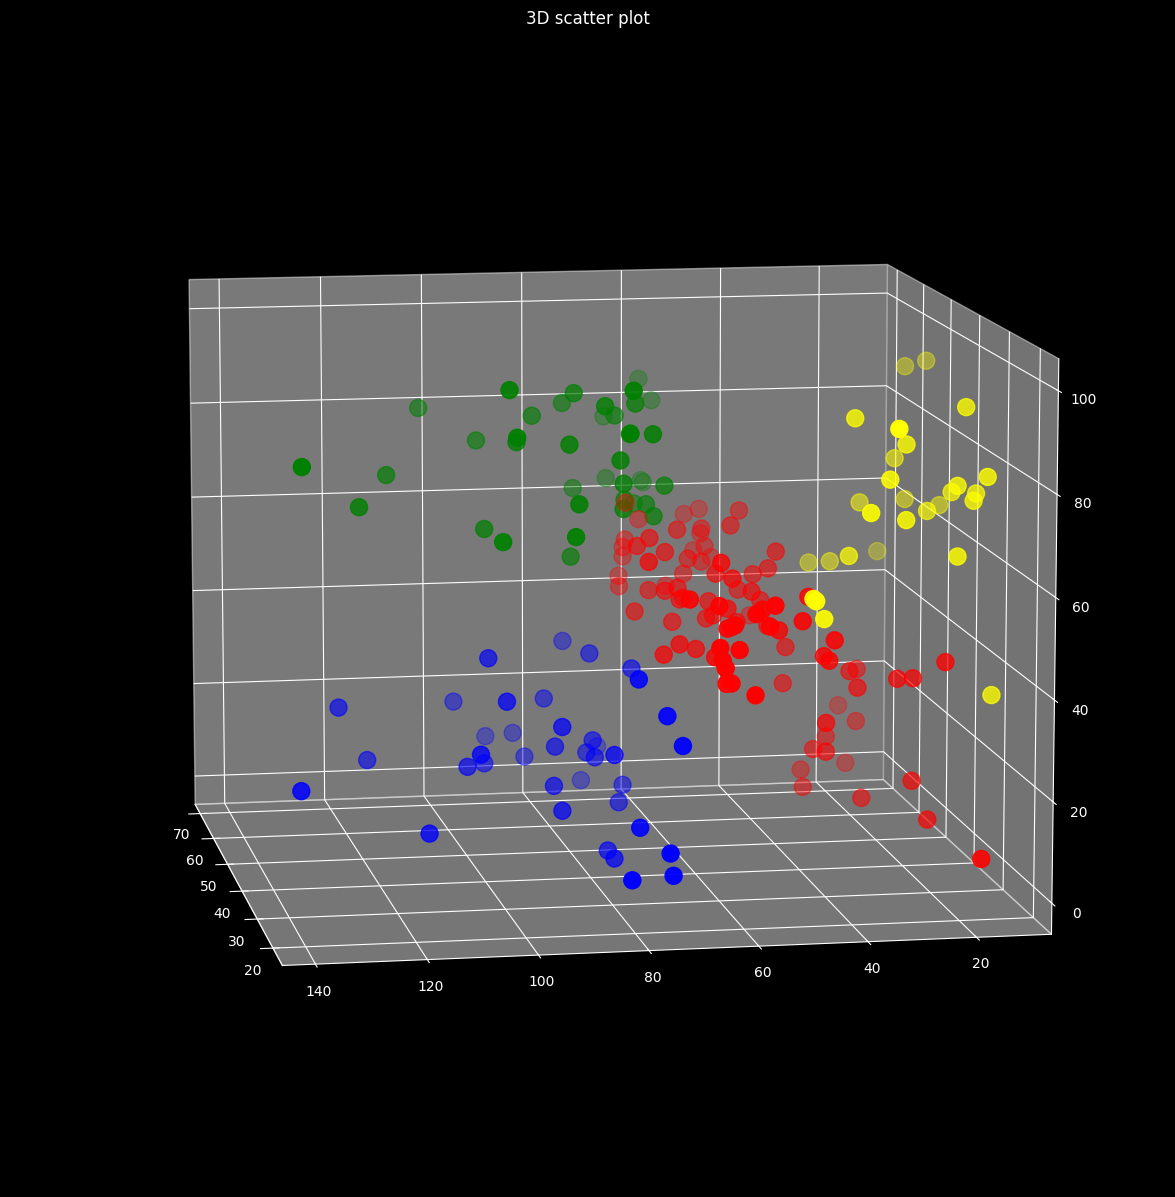

In [96]:
# Creating figure
plt.style.use('dark_background')
fig = plt.figure(figsize = (20, 15))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(df['Age'][df['Cluster_No']==0], df['Annual_Income'][df['Cluster_No']==0], df['Spending_Score(1-100)'][df['Cluster_No']==0], c = "red", s=150)
ax.scatter3D(df['Age'][df['Cluster_No']==1], df['Annual_Income'][df['Cluster_No']==1], df['Spending_Score(1-100)'][df['Cluster_No']==1], c = "green", s=150)
ax.scatter3D(df['Age'][df['Cluster_No']==2], df['Annual_Income'][df['Cluster_No']==2], df['Spending_Score(1-100)'][df['Cluster_No']==2], c = "yellow", s=150)
ax.scatter3D(df['Age'][df['Cluster_No']==3], df['Annual_Income'][df['Cluster_No']==3], df['Spending_Score(1-100)'][df['Cluster_No']==3], c = "blue", s=150)
ax.view_init(10, 170)
plt.title("3D scatter plot")
plt.show()

## Result Of Each Clustering

In [97]:
df.groupby('Cluster_No')[['Age', 'Annual_Income', 'Spending_Score(1-100)']].mean()

,Age,Annual_Income,Spending_Score(1-100)
Cluster_No,,,
0,44.894737,48.705263,42.631579
1,32.692308,86.538462,82.128205
2,24.821429,28.714286,74.250000
3,40.394737,87.000000,18.631579


In [98]:
df.groupby('Cluster_No')[['Age', 'Annual_Income', 'Spending_Score(1-100)']].min()

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [ ]:
df.groupby('Cluster_No')[['Age', 'Annual_Income', 'Spending_Score(1-100)']].max()

/tmp/ipykernel_4918/837908060.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Cluster_No')['Age', 'Annual_Income', 'Spending_Score(1-100)'].max()


,Age,Annual_Income,Spending_Score(1-100)
Cluster_No,,,
0,59,137,40
1,70,69,60
2,35,48,99
3,40,137,97


In [ ]:
df.groupby('Cluster_No')[['Age', 'Annual_Income', 'Spending_Score(1-100)']].std()

/tmp/ipykernel_4918/3090978408.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Cluster_No')['Age', 'Annual_Income', 'Spending_Score(1-100)'].std()


,Age,Annual_Income,Spending_Score(1-100)
Cluster_No,,,
0,11.376931,16.271348,10.915947
1,15.341831,14.522817,14.713616
2,5.571446,10.384665,14.075524
3,3.728650,16.312485,9.364489
